### Twitter Sentiment Analysis

**Problem Statement:** The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

This is practice problem from Analytics Vidhya. You vist the site: https://datahack.analyticsvidhya.com/contest/practice-problem-twitter-sentiment-analysis/

### Import Libraries and load the train and test data

The file is already in csv format so we can simply use the read_csv function of pandas to read and convert the file into pandas dataframe. Inspecting the data, we can see that the train data has 3 columns in it while the test data only contains 2 columns, the id and the tweet respectively.

The train data contains a **label** column. Calling the value_counts function will give us all the values of this column including their counts. The lables columns only has two values which are 0 and 1. We can say that its an inbalanced 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [3]:
train_tweet = pd.read_csv('train_tweets.csv')
test_tweet = pd.read_csv('test_tweets.csv')

In [4]:
train_tweet.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
test_tweet.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [6]:
print('train data shape: %s', train_tweet.shape)
print('test data shape: %s', test_tweet.shape)

train data shape: %s (31962, 3)
test data shape: %s (17197, 2)


In [7]:
train_tweet['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [8]:
length_train = train_tweet['tweet'].str.len()
length_test = test_tweet['tweet'].str.len()

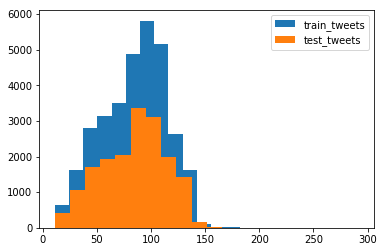

In [9]:
plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

### Data Preprocessing

Now let's take a sample tweet from the train data. Notice that tweeter tags is replaced by '@user' to hide actual user information. We will just remove this from the actual tweets since they don't really convey much information about the tweet

In [10]:
train_tweet.iloc[1,2]

"@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"

#### Removing '@user' tags
The @user tag will be remove by passing the regular expression. If a match is found it will be replaced by 'no space'. We will store the cleaned tweet in a separate column and we will named it as **clean_tweet**

In [11]:
train_tweet['clean_tweet'] = train_tweet['tweet'].str.replace("@[\w]*", '')

In [12]:
train_tweet.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


Checking a sample cleaned tweet shows that the @user tag is sucessfully removed

In [13]:
train_tweet.iloc[1,3]

"  thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"

#### Additional Clean up
Further clean up of data can be perform by removing punctuation, special characters and numeric charaters since they don't also provide much information about the tweet. We can also remove words that are less than 3 characters in length. 

In [14]:
#remove special characters, punctuations and numeric characters
train_tweet['clean_tweet'] = train_tweet['clean_tweet'].str.replace("[^a-zA-Z#]", ' ')

In [15]:
train_tweet.iloc[1,3]

'  thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx     #disapointed #getthanked'

In [16]:
#replace multiple spaces with a single space
train_tweet['clean_tweet'] = train_tweet['clean_tweet'].str.replace(' +',' ' )

In [17]:
train_tweet.iloc[1,3]

' thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked'

In [18]:
#remove words with less that 3 characters
train_tweet['clean_tweet'] = train_tweet['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))

In [19]:
train_tweet.iloc[1,3]

'thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked'

In [20]:
train_tweet.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


### Removing stop words and stemming using NLTK
So far we have performed several steps to clean data. In this section we will utilize the Natural Language Tool Kit to revome stop word from the tweet as well use the stemming. Stemming is a common process in natural languange processing where in words are reduced to its core root.

In [21]:
stop_words = stopwords.words('english')
train_tweet['clean_tweet'] = train_tweet['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if w not in (stop_words)]))

In [22]:
train_tweet.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,#model love take time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [23]:
stemmer = PorterStemmer()
train_tweet['clean_tweet'] = train_tweet['clean_tweet'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [24]:
train_tweet.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct #run
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus offer wheelchair van #...
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in ...,#model love take time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


### Test Data Preprocessing

Performing the same steps we did for the train data to the test data.

In [25]:
test_tweet['clean_tweet'] = test_tweet['tweet'].str.replace("@[\w]*", '')
test_tweet['clean_tweet'] = test_tweet['clean_tweet'].str.replace("[^a-zA-Z#]", ' ')
test_tweet['clean_tweet'] = test_tweet['clean_tweet'].str.replace(' +',' ' )
test_tweet['clean_tweet'] = test_tweet['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
test_tweet['clean_tweet'] = test_tweet['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if w not in (stop_words)]))
test_tweet['clean_tweet'] = test_tweet['clean_tweet'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [26]:
test_tweet.head()

,id,tweet,clean_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,#studiolif #aislif #requir #passion #dedic #wi...
1,31964,@user #white #supremacists want everyone to s...,#white #supremacist want everyon #bird #movi
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe way heal #acn #altwaystoh #healthi #heal
3,31966,is the hp and the cursed child book up for res...,curs child book reserv alreadi #harrypott #pot...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",#bihday amaz hilari #nephew ahmir uncl dave lo...


#### Dropping the unclean tweet column

In [27]:
train_tweet.drop('tweet', axis=1, inplace=True)

In [28]:
test_tweet.drop('tweet', axis=1, inplace=True)

In [29]:
train_tweet.head()

,id,label,clean_tweet
0,1,0,father dysfunct selfish drag kid dysfunct #run
1,2,0,thank #lyft credit caus offer wheelchair van #...
2,3,0,bihday majesti
3,4,0,#model love take time
4,5,0,factsguid societi #motiv


In [30]:
test_tweet.head()

,id,clean_tweet
0,31963,#studiolif #aislif #requir #passion #dedic #wi...
1,31964,#white #supremacist want everyon #bird #movi
2,31965,safe way heal #acn #altwaystoh #healthi #heal
3,31966,curs child book reserv alreadi #harrypott #pot...
4,31967,#bihday amaz hilari #nephew ahmir uncl dave lo...


### Building the Machine Learning Model
Both the train and test data are already cleaned but the tweet is still in its naltural language format. So before we create the machine learning model, we need to convert the tweet into a vector format in order for the Machine Learning model to understand. One common method to convert the tweet into its vector format is to use BAG OF WORDS. Fortunately scikit learn already has a useable library for the BAG OF WORDS which is the CountVectorizer

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(binary=True)
bow_vectorizer.fit(train_tweet['clean_tweet'])
train_bow = bow_vectorizer.transform(train_tweet['clean_tweet'])
test_bow = bow_vectorizer.transform(test_tweet['clean_tweet'])

We are now ready to create the Machine Learning Model. We will be using the Logistic Regression model

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

Splitting the train data and checking for the c that would give the model a good accuracy

In [33]:
X_train, X_test, y_train, y_test = train_test_split(train_bow, train_tweet['label'], random_state=4, test_size=0.3)

In [34]:
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    logreg = LogisticRegression(C=c)
    logreg.fit(X_train, y_train)
    print("Accuray from C=%s: %s"
         % (c, accuracy_score(y_test, logreg.predict(X_test))))

Accuray from C=0.01: 0.9306497027844405
Accuray from C=0.05: 0.9398268849723642
Accuray from C=0.25: 0.95213265199708
Accuray from C=0.5: 0.9558869538012306
Accuray from C=1: 0.9600584002502868


Based from the above result, a c = 1.0 zero will give us a better accuracy for the chosen model. We are now ready to create the final model using the entire training data.

In [35]:
final_model = LogisticRegression(C=1.0)
final_model.fit(train_bow, train_tweet['label'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Making the prediction using the entire test data and saving the result for submission.

In [37]:
predictions = final_model.predict(test_bow)

In [39]:
final_result = pd.DataFrame({'id':test_tweet['id'],'label':predictions})
final_result.to_csv('output.csv',index=False)